In [136]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import platform
from datetime import datetime,timedelta

import folium
from folium import plugins
from folium import Marker
from folium.plugins import Draw

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.io as po

# 운영체제별 한글 폰트 설정
if platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

# Warning 제거
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 
warnings.simplefilter(action='ignore', category=UserWarning)  
pd.set_option('mode.chained_assignment',  None)   
#pd.set_option('mode.chained_assignment', 'warn')

# 전처리

## 네비 데이터 전처리

In [137]:
# camping = pd.DataFrame()

# years = ['2020','2021','2022']
# month = ['01','02','03','04','05','06','07','08','09','10','11','12']
# for year in years:
#     try:
#         for j in month:
#             df = pd.read_excel(f'C:/Users/kjk42/Documents/python/Done/data/data_lab/{year}{j}.xlsx')
#             df['date'] = year+j
#             df = df[df['소분류 카테고리'] =='캠핑']
#             camping = pd.concat([camping,df])
#     except:
#         pass
    
# df = pd.read_excel(f'C:/Users/kjk42/Documents/python/Done/data/data_lab/201911.xlsx')
# df['date'] = '201911'
# df = df[df['소분류 카테고리'] =='캠핑']
# camping = pd.concat([camping,df])

# df = pd.read_excel(f'C:/Users/kjk42/Documents/python/Done/data/data_lab/201912.xlsx')
# df['date'] = '201912'
# df = df[df['소분류 카테고리'] =='캠핑']
# camping = pd.concat([camping,df])

# camping = camping.drop(labels=['순위','중분류 카테고리','소분류 카테고리'],axis=1).reset_index(drop=True)
# camping.to_csv('datalab.csv')

In [138]:
camping = pd.read_csv('data\datalab.csv')
camping = camping.sort_values(by='date').reset_index(drop=True)
loc = pd.read_csv('data\camp_location_1.csv')

In [139]:
   
cam_sp_2020 = camping[(camping['date'].astype(int) >= 202003) & (camping['date'].astype(int) <= 202005)].groupby(['관광지명'],as_index=False).agg(검색건수=('검색건수','sum')).sort_values(by='검색건수',ascending=False).head(10)
cam_sp_2020['year'] = '2020'
cam_sp_2020['sep'] = '1'
cam_sum_2020 = camping[(camping['date'].astype(int) >= 202006) & (camping['date'].astype(int) <= 202008)].groupby(['관광지명'],as_index=False).agg(검색건수=('검색건수','sum')).sort_values(by='검색건수',ascending=False).head(10)
cam_sum_2020['year'] = '2020'
cam_sum_2020['sep'] = '2'
cam_fal_2020 = camping[(camping['date'].astype(int) >= 202009) & (camping['date'].astype(int) <= 2020011)].groupby(['관광지명'],as_index=False).agg(검색건수=('검색건수','sum')).sort_values(by='검색건수',ascending=False).head(10)
cam_fal_2020['year'] = '2020'
cam_fal_2020['sep'] = '3'
cam_win_2020 = camping[(camping['date'].astype(int) >= 202011) & (camping['date'].astype(int) <= 202101)].groupby(['관광지명'],as_index=False).agg(검색건수=('검색건수','sum')).sort_values(by='검색건수',ascending=False).head(10)
cam_win_2020['year'] = '2020'
cam_win_2020['sep'] = '4'
cam_2020 = pd.concat([cam_sp_2020,cam_sum_2020,cam_fal_2020,cam_win_2020])
   
cam_sp_2021 = camping[(camping['date'].astype(int) >= 202103) & (camping['date'].astype(int) <= 202105)].groupby(['관광지명'],as_index=False).agg(검색건수=('검색건수','sum')).sort_values(by='검색건수',ascending=False).head(10)
cam_sp_2021['year'] = '2021'
cam_sp_2021['sep'] = '1'
cam_sum_2021 = camping[(camping['date'].astype(int) >= 202106) & (camping['date'].astype(int) <= 202108)].groupby(['관광지명'],as_index=False).agg(검색건수=('검색건수','sum')).sort_values(by='검색건수',ascending=False).head(10)
cam_sum_2021['year'] = '2021'
cam_sum_2021['sep'] = '2'
cam_fal_2021 = camping[(camping['date'].astype(int) >= 202109) & (camping['date'].astype(int) <= 2021011)].groupby(['관광지명'],as_index=False).agg(검색건수=('검색건수','sum')).sort_values(by='검색건수',ascending=False).head(10)
cam_fal_2021['year'] = '2021'
cam_fal_2021['sep'] = '3'
cam_win_2021 = camping[(camping['date'].astype(int) >= 202111) & (camping['date'].astype(int) <= 202201)].groupby(['관광지명'],as_index=False).agg(검색건수=('검색건수','sum')).sort_values(by='검색건수',ascending=False).head(10)
cam_win_2021['year'] = '2021'
cam_win_2021['sep'] = '4'
cam_2021 = pd.concat([cam_sp_2021,cam_sum_2021,cam_fal_2021,cam_win_2021])

cam_sp_2022 = camping[(camping['date'].astype(int) >= 202203) & (camping['date'].astype(int) <= 202205)].groupby(['관광지명'],as_index=False).agg(검색건수=('검색건수','sum')).sort_values(by='검색건수',ascending=False).head(10)
cam_sp_2022['year'] = '2022'
cam_sp_2022['sep'] = '1'
cam_sum_2022 = camping[(camping['date'].astype(int) >= 202206) & (camping['date'].astype(int) <= 202208)].groupby(['관광지명'],as_index=False).agg(검색건수=('검색건수','sum')).sort_values(by='검색건수',ascending=False).head(10)
cam_sum_2022['year'] = '2022'
cam_sum_2022['sep'] = '2'
cam_fal_2022 = camping[(camping['date'].astype(int) >= 202209) & (camping['date'].astype(int) <= 2022011)].groupby(['관광지명'],as_index=False).agg(검색건수=('검색건수','sum')).sort_values(by='검색건수',ascending=False).head(10)
cam_fal_2022['year'] = '2022'
cam_fal_2022['sep'] = '3'

cam_2022 = pd.concat([cam_sp_2022,cam_sum_2022,cam_fal_2022])

cam_2020['year_sep'] = cam_2020['year']+cam_2020['sep']
cam_2021['year_sep'] = cam_2021['year']+cam_2021['sep']
cam_2022['year_sep'] = cam_2022['year']+cam_2022['sep']
cam_sep = pd.concat([cam_2020,cam_2021,cam_2022])


In [140]:
camping['month']=camping.loc[:,'date'].astype(str).apply(lambda x: x[-2:])

c_1 = cam_sep[cam_sep['sep']=='1'].groupby('관광지명',as_index=False).agg(검색건수=('검색건수','sum'))
c_2 = cam_sep[cam_sep['sep']=='2'].groupby('관광지명',as_index=False).agg(검색건수=('검색건수','sum'))
c_3 = cam_sep[cam_sep['sep']=='3'].groupby('관광지명',as_index=False).agg(검색건수=('검색건수','sum'))
c_4 = cam_sep[cam_sep['sep']=='4'].groupby('관광지명',as_index=False).agg(검색건수=('검색건수','sum'))

In [141]:
camp_sum = camping.groupby(['관광지명','도로명주소'],as_index=False).agg(검색건수=('검색건수','sum'))
loc = loc.rename(columns={'관광지명':'도로명주소'})
camp_loc = camp_sum.merge(loc,on='도로명주소').drop(labels='Unnamed: 0',axis=1)
camp_loc = camp_loc.dropna()

In [142]:
camp_loc['address_summary'] = camp_loc['도로명주소'].apply(lambda x : x.split(' ')[0])
camp_loc['address_summary'].unique()

array(['경기', '경북', '경남', '서울', '강원', '전북', '충남', '대전', '인천', '충북', '부산',
       '광주'], dtype=object)

In [143]:
camp_loc['address_summary'] = camp_loc['address_summary'].str.replace('세종시','세종')

## 전국 사립 캠핑장 전처리

### 영업중

In [144]:
# 출처 https://www.bigdata-forest.kr/
df = pd.read_csv('data/전국 캠핑장 위치 및 부가정보.csv')  # 영업중인 캠핑장 정보
# 한국관광공사 https://www.gocamping.or.kr/ 크롤링
data = pd.read_csv('data/크롤링전처리완료.csv')           # 순위 얻기위해 캠핑장들 개별 조회수 크롤링

In [145]:
df.columns

Index(['CMPSI_ID', 'CMPSI_NM', 'CMPSI_SCTIN_NM', 'CMPSI_LTTD_VAL',
       'CMPSI_LNGTD_VAL', 'CMPSI_ADDR', 'CMPSI_GNRL_CMPGR_CNT',
       'CMPSI_CAR_CMPGR_CNT', 'CMPSI_GLPG_CNT', 'CMPSI_CARBN_CNT',
       'CMPSI_TLROM_CNT', 'CMPSI_SWRM_CNT', 'CMPSI_WSBS_CNT',
       'CMPSI_EXTNG_CNT', 'CMPSI_FFWT_CNT', 'CMPSI_FFSD_CNT',
       'CMPSI_FIRE_SENSR_CNT', 'CMPSI_ETC_SBFCL_NM1', 'CMPSI_ETC_SBFCL_NM2',
       'CMPSI_INFO_DATA_STNDD_DTM', 'CMPSI_CNPRM_DTM', 'DATA_CONNO',
       'OPERT_TPCD', 'OCCRR_DTM', 'CNTCT_BGN_DTM', 'CNTCT_PRCES_DTM',
       'CNTCT_PRCES_STCD', 'TRNSA_ID'],
      dtype='object')

In [146]:
df = df[['CMPSI_NM','CMPSI_ADDR','CMPSI_LTTD_VAL','CMPSI_LNGTD_VAL','CMPSI_SCTIN_NM','CMPSI_ETC_SBFCL_NM1','CMPSI_ETC_SBFCL_NM2']]
df = df.rename(columns={'CMPSI_NM':'name','CMPSI_ADDR':'address','CMPSI_LTTD_VAL':'lat','CMPSI_LNGTD_VAL':'lon','CMPSI_SCTIN_NM':'category','CMPSI_ETC_SBFCL_NM1':'col1','CMPSI_ETC_SBFCL_NM2':'col2'})

In [147]:
df

,name,address,lat,lon,category,col1,col2
0,(주)데일리랜드,강원 춘천시 동산면 윗성골길 36,37.758486,127.845655,자동차야영장,"전기,무선인터넷,장작판매,온수,물놀이장,마트, 편의점",NaN
1,(주)디노담양힐링파크 지점,전남 담양군 봉산면 탄금길 9-26,35.271437,126.960953,"일반야영장,카라반,글램핑","전기,무선인터넷,장작판매,온수,트램폴린,물놀이장,놀이터,산책로,운동시설,마트, 편의점",NaN
2,(주)쉐르빌리안티티,강원 홍천군 서면 밤벌길19번길 111,37.701565,127.596093,글램핑,"전기,무선인터넷,장작판매,온수,물놀이장,놀이터,운동장,운동시설,마트, 편의점","애견 놀이터, 애견 수영장, 탁구장, 족구장, 노래방"
3,(주)아웃오브파크,강원도 춘천시 남면 가옹개길 52-9,37.727813,127.511257,카라반,운동시설,"수영장, 노래방, 찜질방, 카페, 중앙 무대, 분수"
4,(주)양촌여울체험캠프,경상남도 창원시 마산합포구 진전면 의산삼일로 60,35.136501,128.375301,"일반야영장,자동차야영장","전기,온수,물놀이장,산책로,마트, 편의점",NaN
...,...,...,...,...,...,...,...
2517,월등도 캠핑장,경남 사천시 서포면 월등도길 36,34.973959,127.995753,자동차야영장,NaN,NaN
2518,인천송도국제캠핑장,인천 연수구 지식기반로 60 (송도동),37.361597,126.645883,일반야영장,NaN,NaN
2519,가평 워크샵 캠핑장 씨브이,경기 가평군 가평읍 북한강변로 274,37.753107,127.535669,일반야영장,NaN,NaN
2520,제천카라반 더그린,충북 제천시 봉양읍 박달로 256-46,37.143048,128.060448,"일반야영장,자동차야영장,카라반","전기,무선인터넷,장작판매,물놀이장,산책로,운동장,마트, 편의점",NaN


In [148]:
df['address_summary'] = df['address'].apply(lambda x : x.split(' ')[0])
df['address_summary'].unique()

array(['강원', '전남', '강원도', '경상남도', '경북', '제주특별자치도', '전라남도', '충남', '김천시',
       '경기도', '경기', '인천광역시', '경남', '충청남도', '충청북도', '경상북도', '전북', '울산광역시',
       '대구광역시', '서울특별시', '전라북도', '청도군', '충북', '광주광역시', '강화군', '부산광역시',
       '대구시', '충주시', '서울', '인천', '울산시', '포천시', '인천시', '부산', '화천군', '제주시',
       '포항시', '대전광역시', '공주시', '영주시', '청송군', '세종특별자치시', '음성군',
       '018-66/서울시', '가평군', '대전', '제천시', '대구', '울산', '제주도', '부산시', '광주',
       '상서면'], dtype=object)

In [149]:
df['address_summary'] = df['address_summary'].str.replace('경상남도','경남')
df['address_summary'] = df['address_summary'].str.replace('경상남도','경남')
df['address_summary'] = df['address_summary'].str.replace('경상북도','경북')
df['address_summary'] = df['address_summary'].str.replace('전라남도','전남')
df['address_summary'] = df['address_summary'].str.replace('전라북도','전북')
df['address_summary'] = df['address_summary'].str.replace('충청남도','충남')
df['address_summary'] = df['address_summary'].str.replace('충청북도','충북')
df['address_summary'] = df['address_summary'].str.replace('제주특별자치도','제주')
df['address_summary'] = df['address_summary'].str.replace('광역시','')
df['address_summary'] = df['address_summary'].str.replace('018-66/서울시','서울')
df['address_summary'] = df['address_summary'].str.replace('서울특별시','서울')
df['address_summary'] = df['address_summary'].str.replace('김천시','경북')
df['address_summary'] = df['address_summary'].str.replace('청도군','경북')
df['address_summary'] = df['address_summary'].str.replace('강화군','인천')
df['address_summary'] = df['address_summary'].str.replace('포천시','경기')
df['address_summary'] = df['address_summary'].str.replace('포항시','경북')
df['address_summary'] = df['address_summary'].str.replace('공주시','충남')
df['address_summary'] = df['address_summary'].str.replace('영주시','경북')
df['address_summary'] = df['address_summary'].str.replace('청송군','경북')
df['address_summary'] = df['address_summary'].str.replace('세종특별자치시','세종')
df['address_summary'] = df['address_summary'].str.replace('음성군','충북')
df['address_summary'] = df['address_summary'].str.replace('가평군','경기')
df['address_summary'] = df['address_summary'].str.replace('제천시','충북')
df['address_summary'] = df['address_summary'].str.replace('상서면','강원')
df['address_summary'] = df['address_summary'].str.replace('시','')
df['address_summary'] = df['address_summary'].str.replace('도','')

df['address_summary'].unique()

array(['강원', '전남', '경남', '경북', '제주', '충남', '경기', '인천', '충북', '전북', '울산',
       '대구', '서울', '광주', '부산', '충주', '화천군', '대전', '세종'], dtype=object)

In [150]:
result = ','.join(i for i in df['category'])
l = result.split(sep=',')
s = set(l)
for i in s:
    df_s1 = df[df['category'].str.contains(i)]
    df_s2 = df[~df['category'].str.contains(i)]
    df_s1[i] = 1
    df_s2[i] = 0
    df = pd.concat([df_s1,df_s2])

In [151]:
df = df[['name', 'address', 'address_summary', 'lat', 'lon', 'category', '일반야영장', '글램핑', '자동차야영장', '카라반', 'col1', 'col2']]

In [152]:
df1 = df[~df['col1'].isnull()]
df2 = df[df['col1'].isnull()]

In [153]:
df2.isnull().sum()

name                 0
address              0
address_summary      0
lat                  0
lon                  0
category             0
일반야영장                0
글램핑                  0
자동차야영장               0
카라반                  0
col1               547
col2               546
dtype: int64

In [154]:
# df2는 편의시설 관련 두 칼럼 다 결측값이라 보고 데이터셋에서 제외하겠음
df = df1

In [155]:
result = ','.join(i for i in df['col1'])
l = result.split(sep=',')
s = set(l)
s

{' 편의점',
 '놀이터',
 '마트',
 '무선인터넷',
 '물놀이장',
 '산책로',
 '온수',
 '운동시설',
 '운동장',
 '장작판매',
 '전기',
 '트램폴린'}

In [156]:
for i in s:
    df_s1 =  df[df['col1'].str.contains(i)]
    df_s2 = df[~df['col1'].str.contains(i)]
    df_s1[i] = 1
    df_s2[i] = 0
    df = pd.concat([df_s1,df_s2])

In [157]:
df = df.rename(columns={' 편의점':'편의점'})
df = df.drop('col1',axis=1)

In [158]:
df1 = df[~df['col2'].isnull()]
df2 = df[df['col2'].isnull()]

In [159]:
df1_동물 = df1[df1['col2'].str.contains('애견|동물|강아지|반려')]
df1_노동물 = df1[~df1['col2'].str.contains('애견|동물|강아지|반려')]
df1_동물['동물친화'] = 1
df1_노동물['동물친화'] = 0
df1 = pd.concat([df1_동물,df1_노동물])

In [160]:
df = pd.concat([df1,df2])

In [161]:
df['동물친화'] = df['동물친화'].fillna(0).astype('int64')
df = df.sort_index()

In [162]:
df['name'] = df['name'].str.replace('(주)','').str.replace('(','').str.replace(')','')

In [163]:
df.loc[2509,'name'] = '몽고몽고글램핑'

In [164]:
df.reset_index(drop=True)

,name,address,address_summary,lat,lon,category,일반야영장,글램핑,자동차야영장,카라반,...,마트,트램폴린,무선인터넷,전기,장작판매,온수,운동장,산책로,물놀이장,동물친화
0,데일리랜드,강원 춘천시 동산면 윗성골길 36,강원,37.758486,127.845655,자동차야영장,0,0,1,0,...,1,0,1,1,1,1,0,0,1,0
1,디노담양힐링파크 지점,전남 담양군 봉산면 탄금길 9-26,전남,35.271437,126.960953,"일반야영장,카라반,글램핑",1,1,0,1,...,1,1,1,1,1,1,0,1,1,0
2,쉐르빌리안티티,강원 홍천군 서면 밤벌길19번길 111,강원,37.701565,127.596093,글램핑,0,1,0,0,...,1,0,1,1,1,1,1,0,1,1
3,아웃오브파크,강원도 춘천시 남면 가옹개길 52-9,강원,37.727813,127.511257,카라반,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,양촌여울체험캠프,경상남도 창원시 마산합포구 진전면 의산삼일로 60,경남,35.136501,128.375301,"일반야영장,자동차야영장",1,0,1,0,...,1,0,0,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970,옥전캠핑장,충북 제천시 봉양읍 옥전길 273-25,충북,37.179911,128.083516,"일반야영장,자동차야영장",1,0,1,0,...,1,1,0,1,1,1,0,1,1,0
1971,새움정,경북 예천군 보문면 옥천길 30,경북,36.709744,128.556193,일반야영장,1,0,0,0,...,0,0,0,1,0,1,1,0,0,0
1972,몽고몽고글램핑,강원 홍천군 남면 남노일로 1162,강원,37.680188,127.756173,"일반야영장,글램핑",1,1,0,0,...,1,0,1,0,1,1,0,1,0,0
1973,제천카라반 더그린,충북 제천시 봉양읍 박달로 256-46,충북,37.143048,128.060448,"일반야영장,자동차야영장,카라반",1,0,1,1,...,1,0,1,1,1,0,1,1,1,0


In [165]:
df['머지용'] = df['address'].apply(lambda x : x.split(' ')[-2]) + ' ' +df['address'].apply(lambda x : x.split(' ')[-1])

In [166]:
data = data.drop('Unnamed: 0',axis=1)
data = data.dropna(subset='주소')

In [167]:
data[data['주소'].str.count(' ')==1] 

,조회수,제목,주소,전기,온수,마트.편의점,트렘폴린,운동장,놀이터,산책로,장작판매,물놀이장,와이파이,운동시설
6,15694,엘포리글램핑,,1,1,1,1,1,1,1,1,1,1,1
24,15949,캠프리카캠핑장,,1,1,0,1,1,1,1,1,1,1,1
114,15461,섬진강향가오토캠핑장,,1,0,1,0,1,1,0,1,1,1,1
221,15520,반디캠프,,1,1,0,0,0,1,0,1,1,1,1
229,13941,정원캠핑장,,1,1,0,0,0,1,0,1,1,1,1
333,14108,옥샘캠핑장,,1,1,0,0,0,0,0,1,1,1,1
606,11413,웰리힐리파크 오토캠핑장,,1,1,0,0,0,0,0,0,0,1,1
844,12525,안성맞춤 자동차야영장,,1,1,0,0,0,0,1,0,0,0,1
851,15072,사촌해수욕장야영장,,0,0,1,0,0,1,0,0,0,0,1
852,24431,뿌리공원캠핑장,,1,1,0,0,0,1,0,0,0,0,1


In [168]:
data = data[data['주소'].str.count(' ')!=1] 

In [169]:
data['주소'].apply(lambda x : x.split(' ')[-1])

0        
1        
2        
3        
4        
       ..
1455     
1456     
1457     
1458     
1459     
Name: 주소, Length: 1444, dtype: object

In [170]:
data['주소'].apply(lambda x : x.split(' ')[-2])

0        25-100
1           730
2           479
3         122-3
4            38
         ...   
1455         22
1456     111-31
1457       97-2
1458    3770-52
1459       1044
Name: 주소, Length: 1444, dtype: object

In [171]:
data['주소'].apply(lambda x : x.split(' ')[-3])

0        218번길
1          함장로
2          용태리
3          송원길
4          고도길
         ...  
1455    광령평화8길
1456       송현길
1457       법흥리
1458       경강로
1459       설악로
Name: 주소, Length: 1444, dtype: object

In [172]:
data['머지용'] = data['주소'].apply(lambda x : x.split(' ')[-3]) + ' ' + data['주소'].apply(lambda x : x.split(' ')[-2])
data = data[['머지용','조회수']]

In [173]:
df = pd.merge(df,data,on='머지용')
df = df.drop('머지용',axis=1)
df.head()

,name,address,address_summary,lat,lon,category,일반야영장,글램핑,자동차야영장,카라반,...,트램폴린,무선인터넷,전기,장작판매,온수,운동장,산책로,물놀이장,동물친화,조회수
0,디노담양힐링파크 지점,전남 담양군 봉산면 탄금길 9-26,전남,35.271437,126.960953,"일반야영장,카라반,글램핑",1,1,0,1,...,1,1,1,1,1,0,1,1,0,17015
1,쉐르빌리안티티,강원 홍천군 서면 밤벌길19번길 111,강원,37.701565,127.596093,글램핑,0,1,0,0,...,0,1,1,1,1,1,0,1,1,12666
2,아웃오브파크,강원도 춘천시 남면 가옹개길 52-9,강원,37.727813,127.511257,카라반,0,0,0,1,...,0,0,0,0,0,0,0,0,0,20193
3,양촌여울체험캠프,경상남도 창원시 마산합포구 진전면 의산삼일로 60,경남,35.136501,128.375301,"일반야영장,자동차야영장",1,0,1,0,...,0,0,1,0,1,0,1,1,0,17083
4,505펜션&캠핑오공오,충남 공주시 사곡면 호계황골길 43,충남,36.501743,127.020770,일반야영장,1,0,0,0,...,0,1,1,1,1,1,1,1,0,23069


### 전체

In [174]:
# 출처 https://www.data.go.kr/ 
common = pd.read_csv('data/일반야영장업.csv')          # 폐업한 캠핑장 정보까지 있는 데이터셋

In [175]:
common_df = common[['개방서비스명','소재지전체주소','상세영업상태명']]
common_df['location'] = common_df.소재지전체주소.apply(lambda x : x.split(' ')[0])
common_df = common_df.rename(columns={'개방서비스명':'type','상세영업상태명':'state'})

In [176]:
kakao_camp = pd.read_csv('data/kakao_camp.csv')
kakao_camp = kakao_camp.drop(labels='Unnamed: 0',axis=1)
kakao_camp.head(1)

,CMPSI_NM,CMPSI_SCTIN_NM,소재지전체주소,상세영업상태명,lat,lon,kakao_score,지역
0,(주)디노담양힐링파크 지점,"일반야영장,카라반,글램핑",전라남도 담양군 봉산면 기곡리 836-2번지,영업중,35.27,126.96,0.0,전라남도


In [177]:
camp_types = set(', '.join(s for s in kakao_camp['CMPSI_SCTIN_NM'].unique()).replace(' ','').split(','))
locations = kakao_camp['지역'].unique()
status = kakao_camp['상세영업상태명'].unique()
df__ = pd.DataFrame(columns=['location','type','state','count','score'])
for camp_type in camp_types:
    for location in locations:
        for state in status:
            type_count = kakao_camp[(kakao_camp['CMPSI_SCTIN_NM'].str.contains(camp_type))&(kakao_camp['지역']==location)&(kakao_camp['상세영업상태명']==state)]['CMPSI_NM'].count()
            try:
                type_score = kakao_camp[kakao_camp['CMPSI_SCTIN_NM'].str.contains(camp_type)&(kakao_camp['지역']==location)&(kakao_camp['상세영업상태명']==state)]['kakao_score'].astype(float).mean().round(1)
            except:
                type_score = kakao_camp[kakao_camp['CMPSI_SCTIN_NM'].str.contains(camp_type)&(kakao_camp['지역']==location)&(kakao_camp['상세영업상태명']==state)]['kakao_score'].astype(float).mean()
            df__ = df__.append({'location':location,'type':camp_type,'state':state,'count':type_count,'score':type_score},ignore_index=True)
df__ = df__.fillna(0)

In [259]:
df__['ratio'] = (df__['count']/df__['count'].sum()*100).round(2)

## 국립 휴양림 전처리

In [179]:
# 출처 https://www.data.go.kr
df_1 = pd.read_csv('data/국립자연휴양림 예약 정보(200101~200824).csv')
df_2 = pd.read_csv('data/국립자연휴양림 예약 정보(201014~210322).csv')
df_3 = pd.read_csv('data/국립자연휴양림 예약 정보(210329~210923).csv')
df_4 = pd.read_csv('data/국립자연휴양림 예약 정보(210924~220314).csv')

df_info = pd.read_csv('data/산림청 국립자연휴양림관리소_국립자연휴양림 시설관련 정보_20220906.csv')
df_stat = pd.read_csv('data/산림청 국립자연휴양림관리소_국립자연휴양림 이용객 정산관련 데이터_20200630.csv')
df_describe = pd.read_csv('data/산림청 국립자연휴양림관리소_국립자연휴양림 홍보_20220906.csv')

aaa = pd.read_csv('data/산림청 국립자연휴양림관리소_연도별 회원 증가추이 및 회원가입 수_10_21_2021.csv')  

# 카카오맵 별점 크롤링 
bbb = pd.read_csv('data/휴양림_kakao.csv')  

In [180]:
aaa = aaa[aaa.년도 != '2004이전']
aaa = aaa.astype('int64')
aaa = aaa[aaa.년도 >= 2011]
aaa['총합'] = aaa['남성'] + aaa['여성']

In [181]:
df_1 = df_1[['기관ID','기관이름','숙박일자']]
df_1 = df_1.rename(columns={'기관ID':'id','기관이름':'name','숙박일자':'date'})
df_1['id'] = df_1['id'].str.replace("'","")
df_1['name'] = df_1['name'].str.replace("'","")
df_1['date'] = df_1['date'].str.replace("'","")
df_1 = df_1[df_1['date'] != '2(24.7㎡×2실)']  
df_1['date'] = df_1['date'].astype('datetime64')

df_1 = df_1[['date','id','name']]

df_2 = df_2[['기관ID','기관이름','숙박일자']]
df_2 = df_2.rename(columns={'기관ID':'id','기관이름':'name','숙박일자':'date'})
df_2['date'] = df_2['date'].astype('str').astype('datetime64')

df_2 = df_2[['date','id','name']]

df_3 = df_3[['INSTT_ID','INSTT_NM','STNG_DT']]
df_3 = df_3.rename(columns={'INSTT_ID':'id','INSTT_NM':'name','STNG_DT':'date'})
df_3['date'] = df_3['date'].astype('str').astype('datetime64')

df_3 = df_3[['date','id','name']]

df_4 = df_4[['기관아이디','기관이름','숙박일자']]
df_4 = df_4.rename(columns={'기관아이디':'id','기관이름':'name','숙박일자':'date'})
df_4['date'] = df_4['date'].astype('str').astype('datetime64')

df_4 = df_4[['date','id','name']]

# 총 예약 데이터
df_date = pd.concat([df_1,df_2,df_3,df_4,])
# 2021년 데이터만
df_date = df_date[('2021-01-01'<=df_date.date) & (df_date.date<='2021-12-31')]

In [182]:
df_date['month'] = df_date['date'].dt.month
df_date['season'] = df_date['month'].apply(lambda x : 4 if x//3 ==0 else x//3)
df_date['weekday'] = df_date['date'].dt.weekday

In [183]:
# 휴양림별 예약건수
df_id = df_date.groupby(['id','name'],as_index=False).agg(resv_count = ('name','count'))

In [184]:
# 휴양림별 캠핑장 카테고리 추가
d = {}
for i in list(df_id.name.unique()):
    d[i] = list(df_info[df_info.기관명 == i].상품명.unique())

In [185]:
dic ={}
for k in set(df_info.기관명.unique())-{'용지봉 자연휴양림','무의도 자연휴양림'}:
    l = ['야영','오토','카야','반려']
    li = []
    for j in l:
        cnt = 0
        for i in d[k]:
            if j in i: cnt += 1
        li.append(1 if cnt!=0 else 0)
    dic[k]=li

In [186]:
abc = pd.DataFrame(dic).T.reset_index()
abc.columns = ['name','일반야영장','자동차야영장','카라반','동물친화']
# 모든 휴양림에는 객실 또는 방갈로 존재 -> 굳이 칼럼만들지 않아도 됨. 그 외에 일반야영장,자동차야영장,카라반야영장,반려동물 동반객실 을 제공하는 휴양림도 존재  
# 사립 캠핑장과의 칼럼 매칭을 위해 휴양림엔 글램핑 장이 존재하지 않음에도 칼럼 삽입
abc['글램핑'] = 0

df_id = pd.merge(df_id,abc,on='name')

In [187]:
df_info = df_info.drop_duplicates(['아이디'])
df_info = df_info[['아이디','기관명','주소','상품위치위도','상품위치경도']]
df_info = df_info.rename(columns={'아이디':'id','기관명':'name','주소':'address','상품위치위도':'lat','상품위치경도':'lon',})

df_id = pd.merge(df_id,df_info,on=['id','name'])

In [188]:
df_stat = df_stat[['휴양림명','총 가동률','주중 가동률','주말 가동률','합계 금액']]
df_stat = df_stat.rename(columns={'휴양림명':'name','총 가동률':'rate','주중 가동률':'wd_rate','주말 가동률':'we_rate','합계 금액':'revenue'})

df_id = pd.merge(df_id,df_stat,on='name')

In [189]:
df_describe = df_describe[['기관명','최대수용인원','기관설명']]
df_describe = df_describe.rename(columns={'기관명':'name','최대수용인원':'capacity','기관설명':'describe'})

df_id = pd.merge(df_id,df_describe,on='name')

In [190]:
df_id['address_summary'] = df_id.address.apply(lambda x : x.split(' ')[1])

In [191]:
df_id = df_id[['id', 'name', 'address','address_summary', 'lat', 'lon', 'capacity', 'rate', 'wd_rate', 'we_rate', 'resv_count', 'revenue', 'describe','일반야영장','글램핑','자동차야영장','카라반','동물친화']]
df_id[['lon','lat']] = df_id[['lon','lat']].astype('float64')

 

In [192]:
bbb = bbb.drop('Unnamed: 0',axis=1)

df_id = pd.merge(df_id,bbb, on='name')
df_id = df_id.drop('id',axis=1)

In [193]:
# https://www.foresttrip.go.kr/pot/rm/ug/selectFcltUseGdncView.do?hmpgId=0222&menuId=004002005&ruleId=205 에서 용화산자연휴양림 수용인원 찾아 대입
df_id.loc[34,'capacity'] = 361

In [194]:
df_gov = df_id
df_gov.head()

,name,address,address_summary,lat,lon,capacity,rate,wd_rate,we_rate,resv_count,revenue,describe,일반야영장,글램핑,자동차야영장,카라반,동물친화,kakao_score
0,유명산 자연휴양림,(12473) 경기 가평군 설악면 유명산길 79-53,경기,127.482142,37.590103,3000,79.258,76.503,84.123,21959,187641300,자생식물원을 품은 수도권의 숲속 쉼터 유명산 자연휴양림,1,0,1,1,0,4.0
1,용대 자연휴양림,(24605) 강원 인제군 북면 연화동길 7,강원,128.343453,38.237016,800,75.931,71.742,83.579,6919,57035200,"오염되지 않은 자연 속 휴식 공간, 용대 자연휴양림",1,0,0,0,0,4.3
2,산음 자연휴양림,(12527) 경기 양평군 단월면 고북길 347,경기,127.568919,37.597699,2000,71.754,65.420,83.439,14275,115218600,자연 그대로의 모습이 보존된 산음 자연휴양림,1,0,0,0,1,4.4
3,아세안 자연휴양림,(11518) 경기 양주시 백석읍 기산로 472,경기,126.942612,37.772979,200,83.821,82.296,86.711,6201,94209900,아세안 10개국의 문화 체험을 즐길 수 있는 이색 휴양림 아세안 자연휴양림,0,0,0,0,0,3.1
4,신불산 자연휴양림,(44909) 울산 울주군 상북면 청수골길 175,울산,129.023555,35.544551,1000,56.574,48.306,70.961,7685,62717800,영남알프스의 베이스캠프 신불산 폭포 자연휴양림,1,0,0,0,0,3.9


In [195]:
# 이용률_top5
이용률_top = df_gov.sort_values(by='rate',ascending=False).head(5).name
print(f'이용률_top \n {이용률_top}\n')

# 규모_대비_예약_top5
df_gov['규모_대비_예약'] = (df_gov.resv_count / df_gov.capacity).astype('int64')
규모_대비_예약_top = df_gov.sort_values(by='규모_대비_예약',ascending=False).head(5).name
print(f'규모_대비_예약_top \n {규모_대비_예약_top}\n')

# 규모_대비_매출_top5
df_gov['규모_대비_매출'] = (df_gov.revenue / df_gov.capacity).astype('int64')
규모_대비_매출_top = df_gov.sort_values(by='규모_대비_매출',ascending=False).head(5).name
print(f'규모_대비_매출_top \n {규모_대비_매출_top}\n')

# 3개 리스트에 있는 휴양림들이 핫플이라 간주, 그 셋을 묶은 리스트 만듬
# 랭킹 시각화 하였을때 남해편백,방태산은 다소 순위가 낮아 리스트에서 제외하겠음
휴양림top리스트 = list((set(이용률_top) | set(규모_대비_예약_top) | set(규모_대비_매출_top))-{'남해편백 자연휴양림','방태산 자연휴양림'})
print(f'휴양림top리스트 \n {휴양림top리스트}\n')
print(len(휴양림top리스트))

이용률_top 
 32     달음산 자연휴양림
8      방태산 자연휴양림
3      아세안 자연휴양림
22      변산 자연휴양림
25    남해편백 자연휴양림
Name: name, dtype: object

규모_대비_예약_top 
 14      화천숲속 야영장
41    상당산성 자연휴양림
31      진도 자연휴양림
32     달음산 자연휴양림
3      아세안 자연휴양림
Name: name, dtype: object

규모_대비_매출_top 
 31      진도 자연휴양림
41    상당산성 자연휴양림
3      아세안 자연휴양림
36     운악산 자연휴양림
22      변산 자연휴양림
Name: name, dtype: object

휴양림top리스트 
 ['변산 자연휴양림', '아세안 자연휴양림', '진도 자연휴양림', '상당산성 자연휴양림', '운악산 자연휴양림', '달음산 자연휴양림', '화천숲속 야영장']

7


In [196]:
# 시각화 대비해서 휴양림 별 색상 부여
list_dist = list(set(df_gov['name']))
pal = list(sns.color_palette(palette='Spectral', n_colors=len(list_dist)).as_hex())
dict_color = dict(zip(list_dist, pal))

In [197]:
# aaa.to_csv('data/국립자연휴양림관리소_연도별_회원.csv')
# df_date.to_csv('data/국립휴양림예약데이터.csv')
# df_gov.to_csv('data/국립휴양림정보.csv')

In [198]:
# aaa = pd.read_csv('data/국립자연휴양림관리소_연도별_회원.csv')
# df_date = pd.read_csv('data/국립휴양림예약데이터.csv')
# df_gov = pd.read_csv('data/국립휴양림정보.csv') 

# 시각화

## 시계열 관련

### 국립 휴양림 

#### 년도별 가입자 수

<AxesSubplot: xlabel='년도', ylabel='총합'>

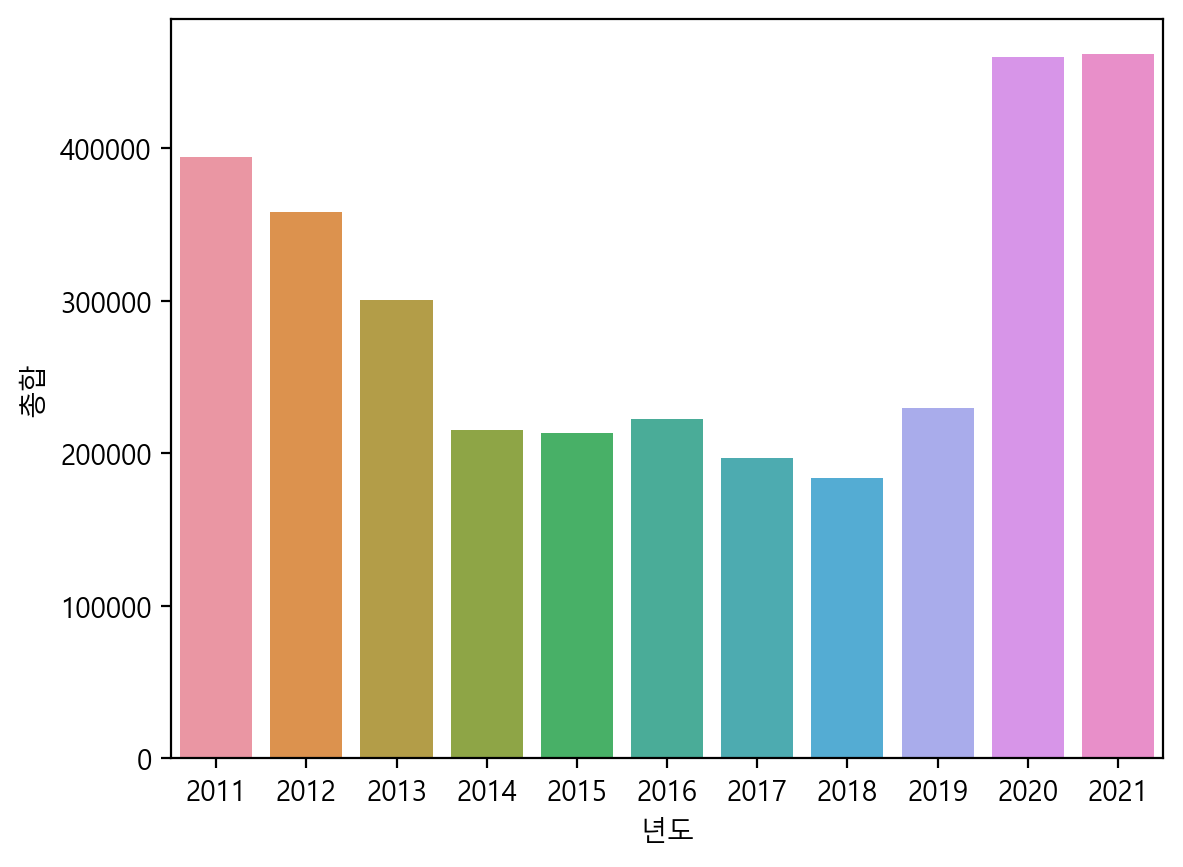

In [199]:
sns.barplot(data = aaa , x='년도', y='총합')

* 국립자연휴양림 예약 사이트 가입자수가 코로나 와중에도 폭발적으로 증가했다.

#### 휴양림별 예약건수 점유율

In [200]:
ratio_total   = list(df_gov.loc[:,'resv_count'])
labels_total  = list(df_gov.loc[:,'name'])

# pull is given as a fraction of the pie radius
fig = go.Figure(data=[go.Pie(labels=labels_total, values=ratio_total)])

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(margin=dict(t=20, b=20, l=10, r=20))
fig.show()

In [201]:
px.scatter(df_gov, x='resv_count',y='revenue', hover_name='name' , trendline="ols", trendline_color_override="red")

* 추세선 위에 있는 휴양림들은 요금단가가 평균 이상이라 볼 수 있다.

#### 일별

In [202]:
df_day = df_date.groupby(['date'],as_index=False).agg(day_resv_count = ('name','count'))
fig = px.bar(df_day, x="date", y="day_resv_count", title='2021년 일별 총방문건수', text_auto=True )
fig.show()

#### 월별

In [203]:
df_month = df_date.groupby(['month'],as_index=False).agg(month_resv_count = ('name','count'))
fig = px.bar(df_month, x="month", y="month_resv_count", title='2021년 월별 총방문건수', text_auto=True )
fig.show()

##### 랭킹

In [204]:
df_month_name = df_date.groupby(['month','name'],as_index=False).agg(month_resv_count = ('name','count'))
df_month_name = pd.merge(df_month_name,df_gov[['name','capacity']],on='name')

# 휴양림별 (month_resv_count/capacity)를 '번잡도'로 정의
# 이 값은 month_resv_count의 단위(개수)와 capacity의 단위(명)가 같지 않아 비율같이 '무차원 수'는 아니지만 휴양림별 인원밀집정도를 나타낼수 있는 지수
df_month_name['번잡도'] = df_month_name['month_resv_count'] / df_month_name['capacity']

# 월별 번잡도 랭킹 추가
lll = []
for i in list(set(df_month_name['month'])):
    df_month_name_ranking = df_month_name[df_month_name['month']==i]
    order = df_month_name_ranking['번잡도'].rank(ascending=0)
    df_month_name_ranking['rank'] = [int(i) for i in order]
    lll.append(df_month_name_ranking)
    
df_month_name = pd.concat(lll)
df_month_name.sort_values(['month', 'name'], ascending=True, inplace=True, ignore_index=True)

In [205]:
# 전처리에서 만든 휴양림top리스트 활용해 42개휴양림 중 상위 7개로 추린 데이터셋 만듬
df_month_named = df_month_name[df_month_name.name.isin(휴양림top리스트)]
df_month_named.name = df_month_named.name.str.replace(' 자연휴양림','').str.replace(' 야영장','')

In [206]:
fig = px.line(df_month_named,
              x = 'month', y = 'rank', color = 'name', color_discrete_map= dict_color, markers=True, text='name')
fig.update_traces(marker=dict(size=11))
fig.update_yaxes(tick0=1, dtick=1,
                 autorange='reversed', title='',
                 visible=True, showticklabels=True)
fig.update_xaxes(tick0=1, dtick=1,
                 title='', visible=True, showticklabels=True)
fig.update_layout(xaxis=dict(showgrid=False),
                  yaxis=dict(showgrid=False) )
fig.update_layout(showlegend=False)
fig.show()

#### 계절별

In [207]:
df_season = df_date.groupby(['season'],as_index=False).agg(season_resv_count = ('name','count'))
fig = px.bar(df_season, x="season", y="season_resv_count", title='2021년 계절별 총방문건수' , text_auto=True)
fig.show()

##### 랭킹

In [208]:
df_season_name = df_date.groupby(['season','name'],as_index=False).agg(season_resv_count = ('name','count'))
df_season_name = pd.merge(df_season_name,df_gov[['name','capacity']],on='name')

# 휴양림별 (season_resv_count/capacity)를 '번잡도'로 정의
# 이 값은 season_resv_count의 단위(개수)와 capacity의 단위(명)가 같지 않아 비율같이 '무차원 수'는 아니지만 휴양림별 인원밀집정도를 나타낼수 있는 지수
df_season_name['번잡도'] = df_season_name['season_resv_count'] / df_season_name['capacity']

# 월별 번잡도 랭킹 추가
lll = []
for i in list(set(df_season_name['season'])):
    df_season_name_ranking = df_season_name[df_season_name['season']==i]
    order = df_season_name_ranking['번잡도'].rank(ascending=0)
    df_season_name_ranking['rank'] = [int(i) for i in order]
    lll.append(df_season_name_ranking)
    
df_season_name = pd.concat(lll)
df_season_name.sort_values(['season', 'name'], ascending=True, inplace=True, ignore_index=True)

In [209]:
# 전처리에서 만든 휴양림top리스트 활용해 42개휴양림 중 상위 7개로 추린 데이터셋 만듬
df_season_named = df_season_name[df_season_name.name.isin(휴양림top리스트)]
df_season_named.name = df_season_name.name.str.replace(' 자연휴양림','').str.replace(' 야영장','')
df_season_named.season = df_season_named.season.astype('str')\
    .str.replace('1','봄').str.replace('2','여름').str.replace('3','가을').str.replace('4','겨울')

In [210]:
fig = px.line(df_season_named, 
              x = 'season', y = 'rank', color = 'name', color_discrete_map= dict_color, markers=True, text='name')
fig.update_traces(marker=dict(size=11))
fig.update_yaxes(tick0=1, dtick=1,
                 autorange='reversed', title='',
                 visible=True, showticklabels=True)
fig.update_xaxes(title='', visible=True, showticklabels=True)
fig.update_layout(xaxis=dict(showgrid=False),
                  yaxis=dict(showgrid=False))
fig.update_layout(showlegend=False)
fig.show()

#### 요일별

In [211]:
df_weekday = df_date.groupby(['weekday'],as_index=False).agg(weekday_resv_count = ('id','count'))
fig = px.bar(df_weekday, x="weekday", y="weekday_resv_count", title='2021년 요일별 총방문건수'  , text_auto=True)
fig.show()

* 생각했던대로 주말 이용객이 많지만 화요일을 제외한 주중에도 이용객이 적지 않다.

In [212]:
fig = px.bar(df_month_name, x="month", y="month_resv_count", color='name')
fig.show()

In [213]:
# names = list(df_month_name.name.unique())
# for i in names:
#     fig = px.bar(df_month_name[df_month_name['name']==i], x="month", y="month_resv_count",title=i)
#     fig.show()

### 사립 캠핑장 by 네비 검색 데이터

#### 월별

In [214]:
fig = px.bar(camping.groupby('month',as_index=False).agg(검색건수=('검색건수','sum')).sort_values(by='month'), x="month", y='검색건수' , text_auto=True)
fig.show()


#### 계절별

In [215]:
fig = px.bar(cam_sep.groupby('sep',as_index=False).agg(검색건수=('검색건수','sum')), x="sep", y='검색건수' , text_auto=True)
fig.show()

In [216]:
ratio_total_1= list(c_1.loc[:,'검색건수'])
labels_total_1 = list(c_1.loc[:,'관광지명'])
ratio_total_2= list(c_2.loc[:,'검색건수'])
labels_total_2 = list(c_2.loc[:,'관광지명'])
ratio_total_3= list(c_3.loc[:,'검색건수'])
labels_total_3 = list(c_3.loc[:,'관광지명'])
ratio_total_4= list(c_4.loc[:,'검색건수'])
labels_total_4 = list(c_4.loc[:,'관광지명'])

fig = make_subplots(rows = 2, cols = 2, horizontal_spacing=0.001,vertical_spacing=0.001,
                    specs=[[{'type':'domain'}, {'type':'domain'}],[{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=("봄", "여름", "가을", "겨울"))

fig.add_trace(go.Pie(labels=labels_total_1, values=ratio_total_1, scalegroup='one'),1,1)

fig.add_trace(go.Pie(labels=labels_total_2, values=ratio_total_2, scalegroup='one'),1,2)

fig.add_trace(go.Pie(labels=labels_total_3, values=ratio_total_3, scalegroup='one'),2,1)

fig.add_trace(go.Pie(labels=labels_total_4, values=ratio_total_4, scalegroup='one'),2,2)

fig.update_layout(margin=dict(t=20, b=20, l=10, r=20))
fig.update_layout(height=1500, width=1300)
fig.show()

# scalegroup='one'  -> 파이그래프 원의 크기로 데이터길이 유추 가능

#### 랭킹

In [217]:
cam_season_검색수총합 = cam_sep.groupby(['sep','관광지명'],as_index=False).agg(검색수총합=('검색건수','sum'))
# 사계절 내내 데이터셋에 존재하는 관광지만 추려 그 리스트 만듬
cam_season_업체리스트 =list(set(c_1.loc[:,'관광지명']) & set(c_2.loc[:,'관광지명']) & set(c_3.loc[:,'관광지명']) & set(c_4.loc[:,'관광지명']))
cam_season_검색수총합 = cam_season_검색수총합[cam_season_검색수총합.관광지명.isin(cam_season_업체리스트)]

In [218]:
# 계절별 검색수총합 랭킹 추가
lll = []
for i in list(set(cam_season_검색수총합['sep'])):
    cam_season_검색수총합_ranking = cam_season_검색수총합[cam_season_검색수총합['sep']==i]
    order = cam_season_검색수총합_ranking['검색수총합'].rank(ascending=0)
    cam_season_검색수총합_ranking['rank'] = [int(i) for i in order]
    lll.append(cam_season_검색수총합_ranking)
    
cam_season_검색수총합 = pd.concat(lll)
cam_season_검색수총합.sort_values(['sep', '관광지명'], ascending=True, inplace=True, ignore_index=True)

In [219]:
cam_season_검색수총합.관광지명 = cam_season_검색수총합.관광지명.str.replace('캠핑장','')
cam_season_검색수총합.sep = cam_season_검색수총합.sep.astype('str')\
    .str.replace('1','봄').str.replace('2','여름').str.replace('3','가을').str.replace('4','겨울')

In [220]:
fig = px.line(cam_season_검색수총합,
              x = 'sep', y = 'rank', color = '관광지명', markers=True, text='관광지명')
fig.update_traces(marker=dict(size=11))
fig.update_yaxes(tick0=1, dtick=1,
                 autorange='reversed', title='',
                 visible=True, showticklabels=True)
fig.update_xaxes(title='', visible=True, showticklabels=True)
fig.update_layout(xaxis=dict(showgrid=False),
                  yaxis=dict(showgrid=False) )
fig.update_layout(showlegend=False)
fig.show()

### 사립 캠핑장 by 크롤링

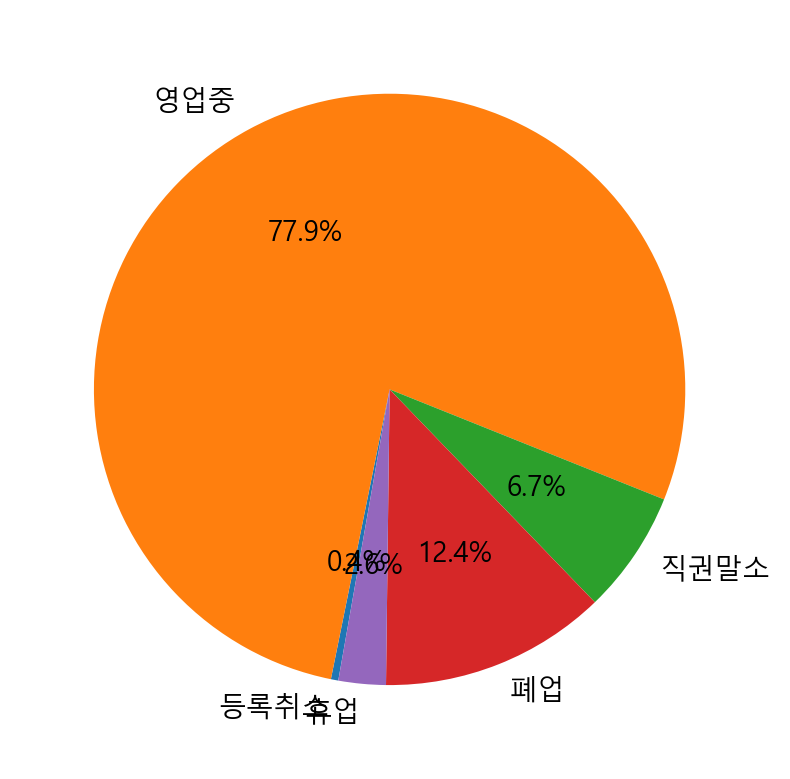

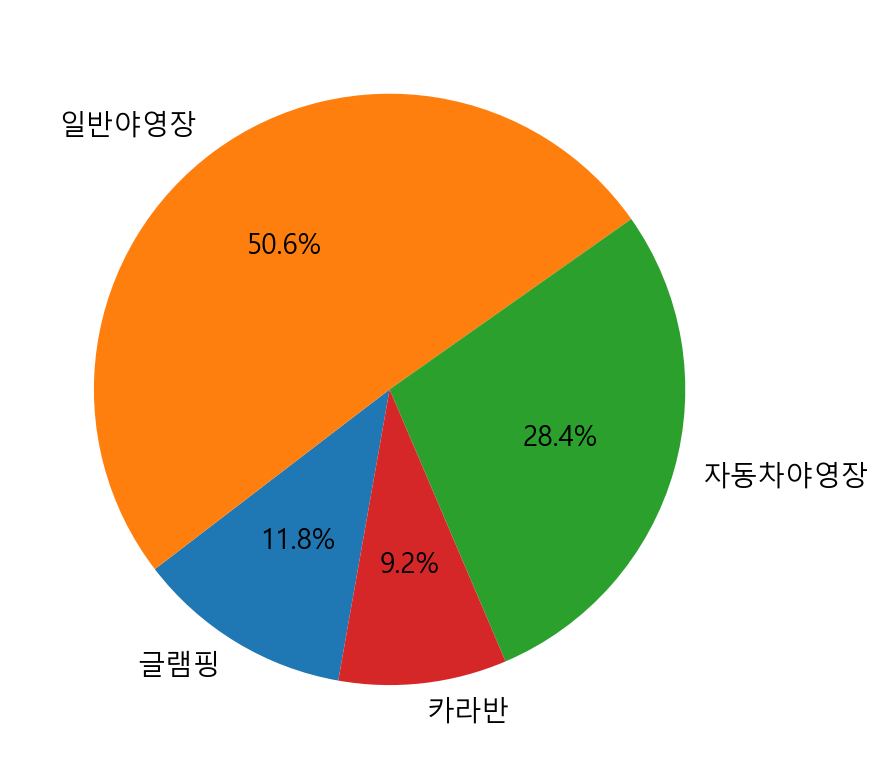

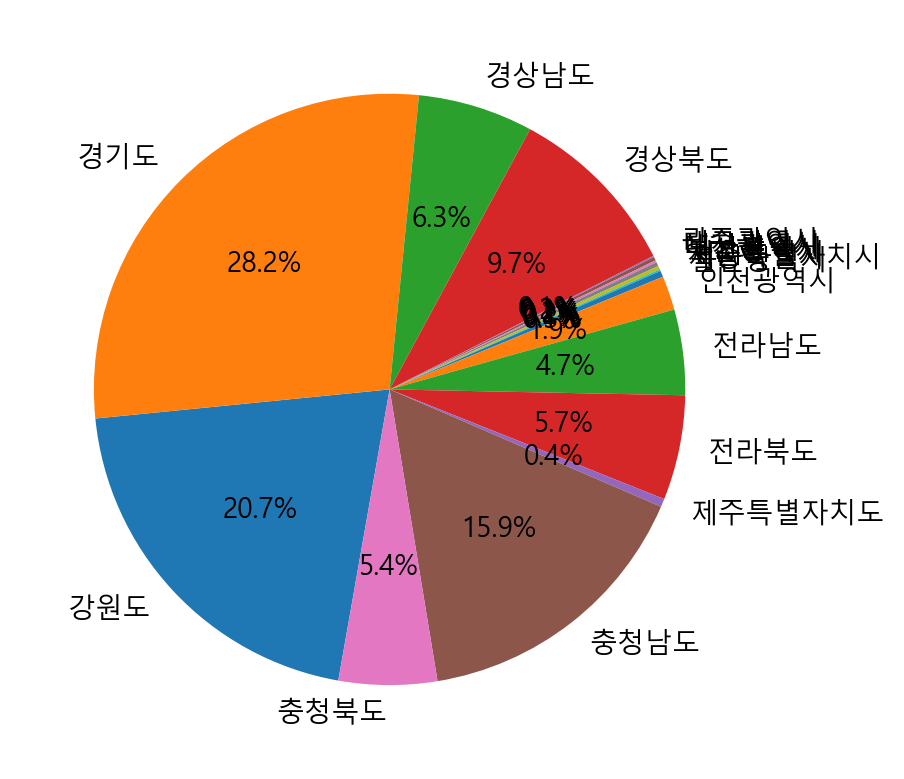

In [221]:
ratio = df__.groupby('state',as_index=False).agg(count=('count','sum'))
plt.pie(ratio['count'], labels=ratio['state'], autopct='%.1f%%',startangle=260, counterclock=False)
plt.show()

ratio_2 = df__.groupby('type',as_index=False).agg(count=('count','sum'))
plt.pie(ratio_2['count'], labels=ratio_2['type'], autopct='%.1f%%',startangle=260, counterclock=False)
plt.show()

ratio_3 = df__.groupby('location',as_index=False).agg(count=('count','sum'))
plt.pie(ratio_3['count'], labels=ratio_3['location'], autopct='%.1f%%',startangle=260, counterclock=False)
plt.show()

In [261]:
fig = px.sunburst(df__, path=['state', 'location', 'type'], values='ratio',
                  color_continuous_scale='RdBu',
                  width=800,height=800)
fig.show()

po.write_html(fig, file='sunburst.html', auto_open=False)

In [223]:
ratio_total_1= list(df.groupby('address_summary',as_index=False).agg(지역별_업체수 = ('name','count')).loc[:,'지역별_업체수'])
labels_total_1 = list(df.groupby('address_summary',as_index=False).agg(지역별_업체수 = ('name','count')).loc[:,'address_summary'])
ratio_total_2= list(df.groupby('address_summary',as_index=False).agg(지역별_조회수_총합 = ('조회수','sum')).loc[:,'지역별_조회수_총합'])
labels_total_2 = list(df.groupby('address_summary',as_index=False).agg(지역별_조회수_총합 = ('조회수','sum')).loc[:,'address_summary'])

fig = make_subplots(rows = 1, cols = 2, horizontal_spacing=0.001,vertical_spacing=0.001,
                    specs=[[{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=("지역별 업체수", "지역별 조회수 총합"))

fig.add_trace(go.Pie(labels=labels_total_1, values=ratio_total_1),1,1)

fig.add_trace(go.Pie(labels=labels_total_2, values=ratio_total_2),1,2)

fig.update_layout(margin=dict(t=20, b=20, l=10, r=20))
#fig.update_layout(height=1000, width=1000)
fig.show()

* 업체수는 충북>인천, 울산>대구 / 조회수총합은 인천>충북 , 대구>울산 .    나머지는 순위 같거나, 개수 적어서 의미없음

In [224]:
# 캠핑장분류_퍼센트
캠핑장분류_퍼센트 = pd.DataFrame(df[['일반야영장','글램핑','자동차야영장','카라반']].mean()*100)
캠핑장분류_퍼센트.columns = ['퍼센트']
캠핑장분류_퍼센트.sort_values(by='퍼센트',inplace=True)

fig = px.imshow(캠핑장분류_퍼센트.T,text_auto=True)
fig.show()

In [225]:
# 편의 시설 구비율
편의시설_구비_퍼센트 = pd.DataFrame(df[['운동장','놀이터','온수','장작판매','물놀이장','트램폴린','무선인터넷','편의점','전기','산책로','운동시설','마트','동물친화']].mean()*100)
편의시설_구비_퍼센트.columns = ['구비율']
편의시설_구비_퍼센트.sort_values(by='구비율',inplace=True)

fig = px.imshow(편의시설_구비_퍼센트.T,text_auto=True)
fig.show()

## 지도

### 국립 휴양림 지도

In [226]:
import json

geo_path = 'Data/map.geojson'
geo_str = json.load(open(geo_path, encoding='utf-8'))

In [227]:
df_gov_address_summary = df_gov.groupby('address_summary',as_index=False).agg(수=('name','count'))

In [228]:
df_gov_map = folium.Map(location=[36, 127], zoom_start=7)
choropleth = folium.Choropleth(geo_data=geo_str,
                               data = df_gov_address_summary,
                               columns=('address_summary', '수'),
                               key_on='feature.properties.CTP_KOR_NM',
                               fill_color='PuRd').add_to(df_gov_map)

for i in range(len(df_gov)):
    folium.Marker(list(df_gov.iloc[i][['lon', 'lat']]),
                 popup=list(df_gov.iloc[i][['name']])[0],
                 icon=folium.Icon(color='green')).add_to(df_gov_map)
    
plugins.ScrollZoomToggler().add_to(df_gov_map)
draw = Draw()
draw.add_to(df_gov_map)

df_gov_map

### 사립 캠핑장 by 네비 검색 데이터 지도

In [229]:
camp_loc.head(4)
camp_loc_address_summary = camp_loc.groupby('address_summary',as_index=False).agg(개수=('검색건수','sum'))

In [230]:
df_map = folium.Map(location=[36, 127], zoom_start=7)
choropleth = folium.Choropleth(geo_data=geo_str,
                               data = camp_loc_address_summary,
                               columns=('address_summary', '개수'),
                               key_on='feature.properties.CTP_KOR_NM',
                               fill_color='PuRd').add_to(df_map)

for i in range(len(camp_loc)):
    folium.Circle(list(camp_loc.iloc[i][['lat', 'lon']]),
                 popup=list(camp_loc.iloc[i][['관광지명']])[0],
                 radius = 100).add_to(df_map)

plugins.ScrollZoomToggler().add_to(df_map)
draw = Draw()
draw.add_to(df_map)

df_map

### 사립 캠핑장 by 크롤링 지도

In [231]:
df_address_summary = df.groupby('address_summary',as_index=False).agg(개수=('name','count'))

In [232]:
df_map = folium.Map(location=[36, 127], zoom_start=7)
choropleth = folium.Choropleth(geo_data=geo_str,
                               data = df_address_summary,
                               columns=('address_summary', '개수'),
                               key_on='feature.properties.CTP_KOR_NM',
                               fill_color='PuRd').add_to(df_map)

for i in range(len(df)):
    folium.Circle(list(df.iloc[i][['lat', 'lon']]),
                 popup=list(df.iloc[i][['name']])[0],
                 radius = 100).add_to(df_map)

plugins.ScrollZoomToggler().add_to(df_map)
draw = Draw()
draw.add_to(df_map)

df_map


# 캠핑장 결정 단계

## 국립 vs 사립 필터링

### 국립 (총 42개만 있어서 단순하게 필터링 구성하였음)

* [국립 야영림 > 지역 : 강원 > 분류 : 일반야영장 > 편의 시설 : 동물친화x > 주말예약률50%이상(사람 너무 없으면 재미없으니까)]  순으로 필터링. 
* 카카오별점 순위 확인 후 1등인 '삼봉 자연휴양림' 으로 결졍 

In [233]:
지역 = '강원'
분류 = '일반야영장'
동물친화_1_0 = 0
주말예약률 = 50

df_gov[df_gov.address_summary==지역][df_gov[분류]==1][df_gov.동물친화==동물친화_1_0][df_gov.we_rate >=주말예약률].sort_values(by='kakao_score',ascending=False).head()

# 삼봉 자연휴양림으로 결정!

,name,address,address_summary,lat,lon,capacity,rate,wd_rate,we_rate,resv_count,revenue,describe,일반야영장,글램핑,자동차야영장,카라반,동물친화,kakao_score,규모_대비_예약,규모_대비_매출
6,삼봉 자연휴양림,(25170) 강원 홍천군 내면 삼봉휴양길 276,강원,128.463411,37.857980,1500,57.750,48.099,75.401,6212,91893200,울창한 활엽수가 조화를 이룬 삼봉 자연휴양림,1,0,0,0,0,5.0,4,61262
5,청태산 자연휴양림,(25261) 강원 횡성군 둔내면 청태산로 610,강원,128.290713,37.522935,1000,63.514,56.479,75.930,11316,135846400,인공림과 천연림이 조화된 청태산 자연휴양림,1,0,0,0,0,4.6,11,135846
11,미천골 자연휴양림,(25040) 강원 양양군 서면 미천골길 115,강원,128.512369,37.947544,1000,56.689,50.861,67.220,8002,68676000,"문화 유적 탐방과 자연 교육 체험, 미천골 자연휴양림",1,0,1,0,0,4.5,8,68676
1,용대 자연휴양림,(24605) 강원 인제군 북면 연화동길 7,강원,128.343453,38.237016,800,75.931,71.742,83.579,6919,57035200,"오염되지 않은 자연 속 휴식 공간, 용대 자연휴양림",1,0,0,0,0,4.3,8,71294
34,용화산 자연휴양림,(24201) 강원 춘천시 사북면 사여골길 294,강원,127.759470,38.014179,361,45.879,38.721,59.113,7057,84843900,"산림청이 선정한 100대 명산, 용화산 자연휴양림",1,0,0,0,0,4.2,19,235024


### 사립

* [사립 캠핑장 > 지역 : 경기 > 분류 : 자동차 야영장 > 편의 시설 : 전기]  순으로 필터링. 조회수 순위 확인 후 1등인 '갈릴리 야영장' 으로 결졍 

In [234]:
data = dict(
    number=[len(df_gov)+len(df),len(df)],
    stage=["Total", "국립vs사립"])
fig = px.funnel(data, x='number', y='stage')
fig.show()

## 지역별 필터링

In [235]:
# '전남', '강원', '경남', '충남', '경북', '경기', '전북', '인천', '충북', '광주', '대구', '부산', '서울', '대전', '울산', '제주', '세종'

wannago = '경기'
df_wannago = df[df['address_summary']==wannago]

In [236]:
data = dict(
    number=[len(df_gov)+len(df),len(df),len(df_wannago)],
    stage=['Total', '국립vs사립','지역'])
fig = px.funnel(data, x='number', y='stage')
fig.show()

##### 조회수 top 10 리스트

In [237]:
df_wannago.sort_values(by='조회수',ascending=False).head(10)

,name,address,address_summary,lat,lon,category,일반야영장,글램핑,자동차야영장,카라반,...,트램폴린,무선인터넷,전기,장작판매,온수,운동장,산책로,물놀이장,동물친화,조회수
310,파인힐빌리지 캠핑장,경기도 동두천시 안흥로 65-42 (안흥동),경기,37.926410,127.043898,일반야영장,1,0,0,0,...,0,1,1,1,1,0,1,1,0,64077
372,갈릴리 야영장,경기 평택시 안중읍 안중북로 119,경기,36.999756,126.920887,자동차야영장,0,0,1,0,...,1,1,1,1,1,0,0,1,0,54660
152,알멕스랜드캠핑장,경기도 연천군 왕징면 왕산로 218번길 25-100,경기,38.074565,127.007239,"자동차야영장,카라반",0,0,1,1,...,1,1,1,1,1,1,1,1,0,36970
164,연천재인폭포오토캠핑장,경기도 연천군 연천읍 고문리 117-1번지,경기,38.065264,127.127366,"일반야영장,카라반",1,0,0,1,...,0,1,1,1,1,1,1,1,0,30271
224,킨텍스캠핑장,경기 고양시 일산서구 킨텍스로 217-25 (대화동),경기,37.663364,126.739254,"일반야영장,자동차야영장",1,0,1,0,...,0,1,1,0,1,0,0,0,0,27622
354,해자연캠핑장,경기 남양주시 오남읍 팔현로175번길 310-60,경기,37.701791,127.264064,자동차야영장,0,0,1,0,...,1,1,1,1,1,0,0,1,0,25039
293,메사캠핑장,경기도 포천시 이동면 도평리 498-1 등 8필지,경기,38.078123,127.387700,일반야영장,1,0,0,0,...,0,1,1,0,1,0,0,0,0,24118
346,파쇠꼴마을고고캠핑장,경기 파주시 법원읍 술이홀로 1338-38 경기도 파주시 법원읍 금곡리 321-32,경기,37.882681,126.870905,자동차야영장,0,0,1,0,...,0,1,1,1,0,0,0,1,0,24009
155,양시 미술관옆 캠핑장,경기 양주시 장흥면 권율로 185,경기,37.731145,126.949410,"일반야영장,카라반",1,0,0,1,...,0,0,1,0,1,0,0,0,0,22952
29,구름계곡캠핑장,경기도 가평군 북면 제령리 219-2번지,경기,37.887901,127.538741,"일반야영장,자동차야영장",1,0,1,0,...,0,1,1,1,1,0,1,0,0,22614


##### 지도

In [238]:
시도별_위경도  = pd.read_excel('data/시도별 위경도.xlsx')    
wannago_시도별_위경도 = 시도별_위경도[시도별_위경도.시도 == wannago]

In [239]:
df_wannago_map = folium.Map(location=[wannago_시도별_위경도.iloc[0,1], wannago_시도별_위경도.iloc[0,2]], zoom_start=9)
for i in range(len(df_wannago)):
    folium.Marker(list(df_wannago.iloc[i][['lat', 'lon']]),
                        popup=list(df_wannago.iloc[i][['name']])[0],
                        ).add_to(df_wannago_map)

plugins.ScrollZoomToggler().add_to(df_wannago_map)
draw = Draw()
draw.add_to(df_wannago_map)

df_wannago_map

## 분류별 필터링

In [240]:
# '일반야영장','글램핑','자동차야영장','카라반' 중 필터 하나 선택

my_choice = '자동차야영장'
df_my_choice = df_wannago[df_wannago[my_choice]==1]

In [241]:
data = dict(
    number=[len(df_gov)+len(df),len(df),len(df_wannago),len(df_my_choice)],
    stage=['Total', '국립vs사립','지역','분류'])
fig = px.funnel(data, x='number', y='stage')
fig.show()

##### 조회수 top 10 리스트

In [242]:
df_my_choice.sort_values(by='조회수',ascending=False).head(10)

,name,address,address_summary,lat,lon,category,일반야영장,글램핑,자동차야영장,카라반,...,트램폴린,무선인터넷,전기,장작판매,온수,운동장,산책로,물놀이장,동물친화,조회수
372,갈릴리 야영장,경기 평택시 안중읍 안중북로 119,경기,36.999756,126.920887,자동차야영장,0,0,1,0,...,1,1,1,1,1,0,0,1,0,54660
152,알멕스랜드캠핑장,경기도 연천군 왕징면 왕산로 218번길 25-100,경기,38.074565,127.007239,"자동차야영장,카라반",0,0,1,1,...,1,1,1,1,1,1,1,1,0,36970
224,킨텍스캠핑장,경기 고양시 일산서구 킨텍스로 217-25 (대화동),경기,37.663364,126.739254,"일반야영장,자동차야영장",1,0,1,0,...,0,1,1,0,1,0,0,0,0,27622
354,해자연캠핑장,경기 남양주시 오남읍 팔현로175번길 310-60,경기,37.701791,127.264064,자동차야영장,0,0,1,0,...,1,1,1,1,1,0,0,1,0,25039
346,파쇠꼴마을고고캠핑장,경기 파주시 법원읍 술이홀로 1338-38 경기도 파주시 법원읍 금곡리 321-32,경기,37.882681,126.870905,자동차야영장,0,0,1,0,...,0,1,1,1,0,0,0,1,0,24009
29,구름계곡캠핑장,경기도 가평군 북면 제령리 219-2번지,경기,37.887901,127.538741,"일반야영장,자동차야영장",1,0,1,0,...,0,1,1,1,1,0,1,0,0,22614
334,평화누리캠핑장,경기 파주시 문산읍 임진각로 148-40,경기,37.892043,126.744793,"일반야영장,자동차야영장",1,0,1,0,...,0,0,1,1,1,0,0,0,0,20641
316,가평 물골숲 계곡 캠핑장,경기 가평군 상면 물골길 120,경기,37.836756,127.314322,자동차야영장,0,0,1,0,...,1,1,1,1,1,0,0,1,0,20389
317,구봉산오토캠핑장 나인힐스,경기 용인시 처인구 원삼면 보개원삼로1372번길 41,경기,37.117742,127.313195,"자동차야영장,카라반",0,0,1,1,...,1,1,1,1,1,0,0,1,0,18828
344,나라펜션캠핑장,경기 안산시 단원구 장불길 31-23 (대부남동),경기,37.199770,126.560373,자동차야영장,0,0,1,0,...,1,0,1,1,1,0,0,0,0,18203


##### 지도

In [243]:
df_my_choice_map = folium.Map(location=[wannago_시도별_위경도.iloc[0,1], wannago_시도별_위경도.iloc[0,2]], zoom_start=9)
for i in range(len(df_my_choice)):
    folium.Marker(list(df_my_choice.iloc[i][['lat', 'lon']]),
                        popup=list(df_my_choice.iloc[i][['name']])[0],
                        radius = 100).add_to(df_my_choice_map)

plugins.ScrollZoomToggler().add_to(df_my_choice_map)
draw = Draw()
draw.add_to(df_my_choice_map)

df_my_choice_map

In [244]:
""" def color_select(row):  
    if row[my_choice] == 1 : return 'blue'
    else : return 'red'  

df_my_choice_map = folium.Map(location=[36, 127], tiles='openstreetmap', zoom_start=7)

for _, row in df.iterrows():
    folium.Circle(location = [row['lat'], row['lon']],
                  radius = 200,
                  popup=row['name'],
                  color = color_select(row)).add_to(df_my_choice_map)
 
plugins.ScrollZoomToggler().add_to(df_my_choice_map)
draw = Draw()
draw.add_to(df_my_choice_map)
    
df_my_choice_map """


" def color_select(row):  \n    if row[my_choice] == 1 : return 'blue'\n    else : return 'red'  \n\ndf_my_choice_map = folium.Map(location=[36, 127], tiles='openstreetmap', zoom_start=7)\n\nfor _, row in df.iterrows():\n    folium.Circle(location = [row['lat'], row['lon']],\n                  radius = 200,\n                  popup=row['name'],\n                  color = color_select(row)).add_to(df_my_choice_map)\n \nplugins.ScrollZoomToggler().add_to(df_my_choice_map)\ndraw = Draw()\ndraw.add_to(df_my_choice_map)\n    \ndf_my_choice_map "

## 편의시설 별 필터링

In [245]:
# '운동장','놀이터','온수','장작판매','물놀이장','트램폴린','무선인터넷','편의점','전기','산책로','운동시설','마트','동물친화' 중 택일
my_choice_2 = '전기'
df_my_choice_2 = df_my_choice[df_my_choice[my_choice_2]==1]

In [246]:
data = dict(
    number=[len(df_gov)+len(df),len(df),len(df_wannago),len(df_my_choice),len(df_my_choice_2)],
    stage=['Total', '국립vs사립','지역','분류','편의시설'])
fig = px.funnel(data, x='number', y='stage')
fig.show()

### 조회수 top 10 리스트

In [247]:
df_my_choice_2.sort_values(by='조회수',ascending=False).head(10)

,name,address,address_summary,lat,lon,category,일반야영장,글램핑,자동차야영장,카라반,...,트램폴린,무선인터넷,전기,장작판매,온수,운동장,산책로,물놀이장,동물친화,조회수
372,갈릴리 야영장,경기 평택시 안중읍 안중북로 119,경기,36.999756,126.920887,자동차야영장,0,0,1,0,...,1,1,1,1,1,0,0,1,0,54660
152,알멕스랜드캠핑장,경기도 연천군 왕징면 왕산로 218번길 25-100,경기,38.074565,127.007239,"자동차야영장,카라반",0,0,1,1,...,1,1,1,1,1,1,1,1,0,36970
224,킨텍스캠핑장,경기 고양시 일산서구 킨텍스로 217-25 (대화동),경기,37.663364,126.739254,"일반야영장,자동차야영장",1,0,1,0,...,0,1,1,0,1,0,0,0,0,27622
354,해자연캠핑장,경기 남양주시 오남읍 팔현로175번길 310-60,경기,37.701791,127.264064,자동차야영장,0,0,1,0,...,1,1,1,1,1,0,0,1,0,25039
346,파쇠꼴마을고고캠핑장,경기 파주시 법원읍 술이홀로 1338-38 경기도 파주시 법원읍 금곡리 321-32,경기,37.882681,126.870905,자동차야영장,0,0,1,0,...,0,1,1,1,0,0,0,1,0,24009
29,구름계곡캠핑장,경기도 가평군 북면 제령리 219-2번지,경기,37.887901,127.538741,"일반야영장,자동차야영장",1,0,1,0,...,0,1,1,1,1,0,1,0,0,22614
334,평화누리캠핑장,경기 파주시 문산읍 임진각로 148-40,경기,37.892043,126.744793,"일반야영장,자동차야영장",1,0,1,0,...,0,0,1,1,1,0,0,0,0,20641
316,가평 물골숲 계곡 캠핑장,경기 가평군 상면 물골길 120,경기,37.836756,127.314322,자동차야영장,0,0,1,0,...,1,1,1,1,1,0,0,1,0,20389
317,구봉산오토캠핑장 나인힐스,경기 용인시 처인구 원삼면 보개원삼로1372번길 41,경기,37.117742,127.313195,"자동차야영장,카라반",0,0,1,1,...,1,1,1,1,1,0,0,1,0,18828
344,나라펜션캠핑장,경기 안산시 단원구 장불길 31-23 (대부남동),경기,37.199770,126.560373,자동차야영장,0,0,1,0,...,1,0,1,1,1,0,0,0,0,18203


### 지도

In [248]:
df_my_choice_2_map = folium.Map(location=[wannago_시도별_위경도.iloc[0,1], wannago_시도별_위경도.iloc[0,2]], zoom_start=9)
for i in range(len(df_my_choice_2)):
    folium.Marker(list(df_my_choice_2.iloc[i][['lat', 'lon']]),
                        popup=list(df_my_choice_2.iloc[i][['name']])[0],
                        ).add_to(df_my_choice_2_map)

plugins.ScrollZoomToggler().add_to(df_my_choice_2_map)
draw = Draw()
draw.add_to(df_my_choice_2_map)

df_my_choice_2_map

In [249]:
df_my_choice_2_map.save('map_of_final_list.html')

In [250]:
""" import plotly.graph_objects as go

fig = go.Figure(data=go.Scattergeo(
        lon = df['lon'],
        lat = df['lat'],
        text = df['name'],
        mode = 'markers',
        marker_color = df[my_choice],
        ))
fig.update_layout(
        title = f'{my_choice}',
        geo_scope='asia',
    )
fig.show() """

" import plotly.graph_objects as go\n\nfig = go.Figure(data=go.Scattergeo(\n        lon = df['lon'],\n        lat = df['lat'],\n        text = df['name'],\n        mode = 'markers',\n        marker_color = df[my_choice],\n        ))\nfig.update_layout(\n        title = f'{my_choice}',\n        geo_scope='asia',\n    )\nfig.show() "

In [251]:
""" # 카테고리별
카테고리 = ['일반야영장','글램핑','자동차야영장','카라반',]

fig = make_subplots(rows = 2, cols = 2, horizontal_spacing=0.001,vertical_spacing=0.001,
                    specs=[[{'type':'domain'}, {'type':'domain'}],[{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=("일반야영장", "글램핑", "자동차야영장", "카라반"))

for my_choice in 카테고리:  
    df_my_choice = df[df[my_choice]==1]
    df_not_my_choice = df[df[my_choice]==0]

    ratio_total   = list(df.groupby([my_choice],as_index=False).agg(개수=('name','count')).loc[:,'개수'])
    labels_total  = list(df.groupby([my_choice],as_index=False).agg(개수=('name','count')).loc[:,my_choice])

    fig = go.Figure(data=[go.Pie(labels=labels_total, values=ratio_total)])
    fig.update_layout(margin=dict(t=20, b=20, l=10, r=20),title=my_choice)
    fig.update_traces(textposition='inside', textinfo='percent+label')
    
    fig.show() """

' # 카테고리별\n카테고리 = [\'일반야영장\',\'글램핑\',\'자동차야영장\',\'카라반\',]\n\nfig = make_subplots(rows = 2, cols = 2, horizontal_spacing=0.001,vertical_spacing=0.001,\n                    specs=[[{\'type\':\'domain\'}, {\'type\':\'domain\'}],[{\'type\':\'domain\'}, {\'type\':\'domain\'}]],\n                    subplot_titles=("일반야영장", "글램핑", "자동차야영장", "카라반"))\n\nfor my_choice in 카테고리:  \n    df_my_choice = df[df[my_choice]==1]\n    df_not_my_choice = df[df[my_choice]==0]\n\n    ratio_total   = list(df.groupby([my_choice],as_index=False).agg(개수=(\'name\',\'count\')).loc[:,\'개수\'])\n    labels_total  = list(df.groupby([my_choice],as_index=False).agg(개수=(\'name\',\'count\')).loc[:,my_choice])\n\n    fig = go.Figure(data=[go.Pie(labels=labels_total, values=ratio_total)])\n    fig.update_layout(margin=dict(t=20, b=20, l=10, r=20),title=my_choice)\n    fig.update_traces(textposition=\'inside\', textinfo=\'percent+label\')\n    \n    fig.show() '

# 가고싶은 곳을 결정 했다면?

In [252]:
mydecision = '갈릴리'
df_mydecision = df[df['name'].str.contains(mydecision)] 
df_mydecision[['name','address','조회수']]

,name,address,조회수
372,갈릴리 야영장,경기 평택시 안중읍 안중북로 119,54660


Text(0.5, 1.0, '갈릴리 야영장 캠핑장 분류')

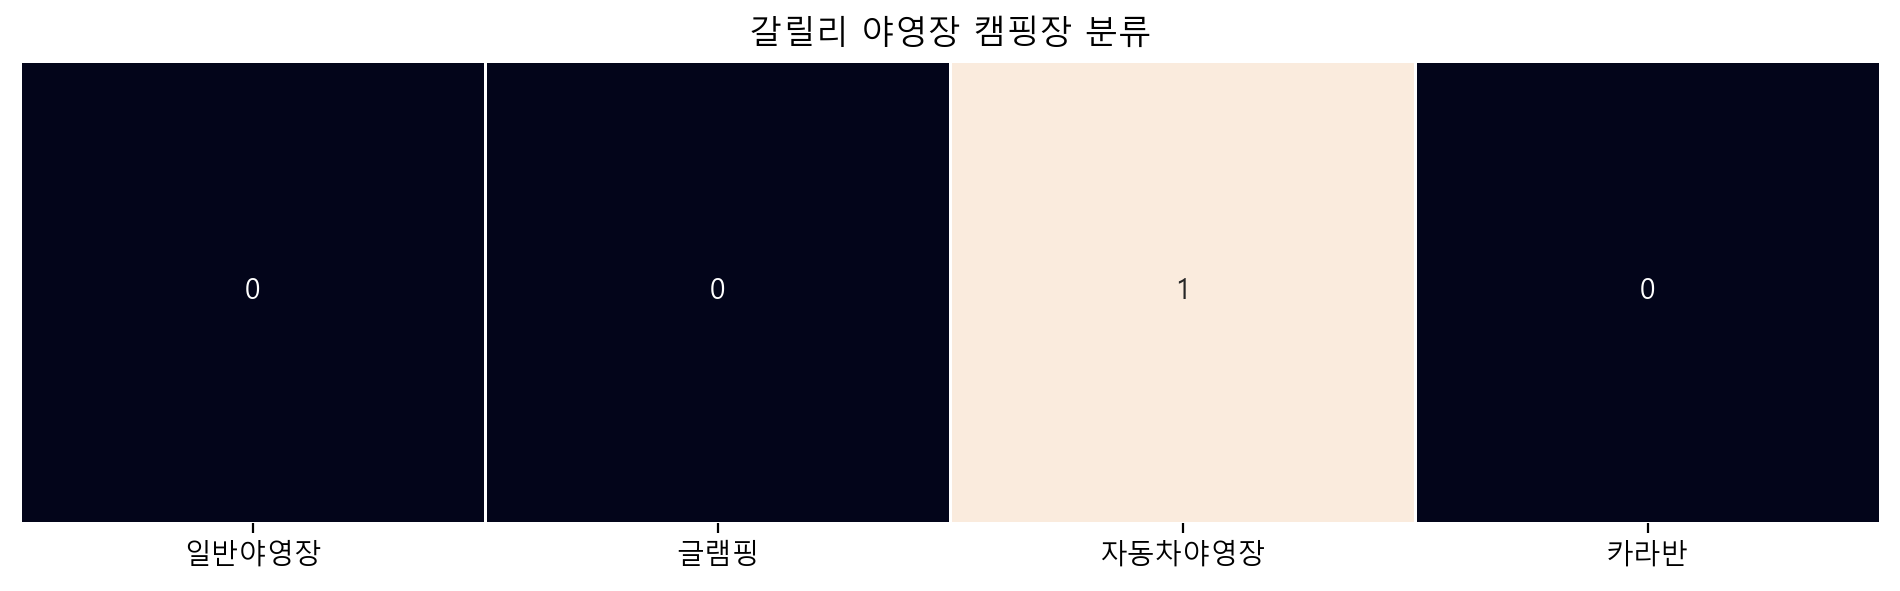

In [253]:
캠핑장분류 = pd.DataFrame(df_mydecision[['일반야영장','글램핑','자동차야영장','카라반']])
fig, ax = plt.subplots(figsize=(12,3))
sns.heatmap(캠핑장분류, annot=True, cbar=False, linewidths= 0.5, yticklabels=False).set_title(f'{list(df_mydecision.name)[0]} 캠핑장 분류')

Text(0.5, 1.0, '갈릴리 야영장 편의시설 구비')

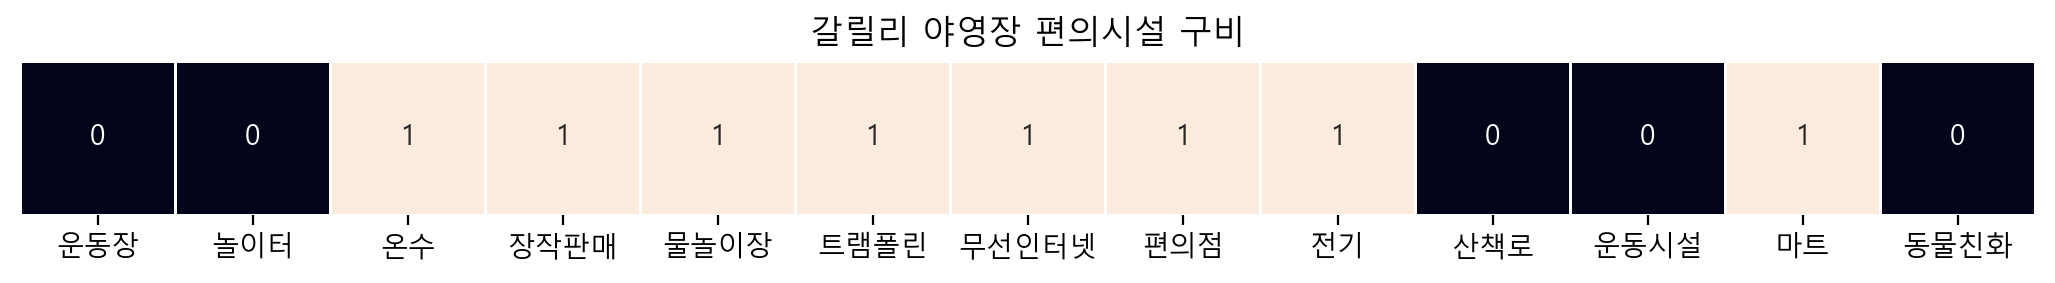

In [254]:
편의시설_구비 = pd.DataFrame(df_mydecision[['운동장','놀이터','온수','장작판매','물놀이장','트램폴린','무선인터넷','편의점','전기','산책로','운동시설','마트','동물친화']])
fig, ax = plt.subplots(figsize=(13,1))
sns.heatmap(편의시설_구비, annot=True, cbar=False, linewidths= 0.5, yticklabels=False).set_title(f'{list(df_mydecision.name)[0]} 편의시설 구비')